In [19]:
import os
import math
import pickle
import numpy as np
from math import log
from scipy import signal 
import matplotlib as mpl
from statistics import mean
import matplotlib.pyplot as plt
from collections import defaultdict, OrderedDict

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
rcParams.update({'figure.max_open_warning': 0,
                 'font.size': 14,
                 'axes.titlesize': 14,
                 'axes.labelsize': 14,
                 'xtick.direction': 'in',
                 'ytick.direction': 'in',
                 'xtick.labelsize': 12,
                 'ytick.labelsize': 12})

#rcParams.keys() 

In [39]:
hists={}
pdata = []
dirname = '/home/furkan/data/test_pods/'
for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
        #str(os.path.splitext(filename)[0]) 
        pdata: pdata.append('Run_' + '[' + filename.split('.pkl')[0] + ']')
        print(filename)
        with open(dirname+filename,'rb') as fin:
            hin = pickle.load(fin)
            print(hin)
            for k in hin.keys():
                #print(k, '=>', hin[k])
                if k in hists:
                    hists[k]+=hin[k]
                else: 
                    hists[k]=hin[k]
                    

2020-02-26_17-25-27.pkl
{'Ch1': array([0.06616, 0.04366, 0.07806, ..., 1.31896, 1.27026, 1.28166]), 'Ch2': array([-0.071941,  0.046759,  0.022859, ...,  1.142759,  1.141959,
        1.156859]), 'Ch3': array([-5.240000e-04,  3.787600e-02,  7.457600e-02, ...,  1.230076e+00,
        1.193076e+00,  1.206876e+00]), 'Ch4': array([-0.0196,  0.0056, -0.0258, ...,  1.5448,  1.4536,  1.589 ]), 'Ch5': array([-0.027728, -0.038228,  0.021572, ...,  1.421472,  1.420572,
        1.475372]), 'Ch7': array([ 0.038905, -0.003795,  0.104005, ...,  1.564605,  1.533705,
        1.491105])}
2020-02-26_22-37-37.pkl
{'Ch1': array([ 0.032513,  0.000613,  0.042113, ..., -0.157887, -0.258387,
       -0.160387]), 'Ch2': array([ 0.062876,  0.036876,  0.066076, ..., -0.283124, -0.312424,
       -0.302824]), 'Ch3': array([ 0.149829,  0.089529,  0.098329, ..., -0.302771, -0.299071,
       -0.224971]), 'Ch4': array([ 0.048654,  0.061054,  0.144254, ..., -0.015946,  0.046254,
       -0.022546]), 'Ch5': array([ 0.016727,

In [40]:
for key in hists.keys():
    print(key,value)

Ch1 [ 0.081033  0.008233  0.054933 ... -0.115067 -0.186167 -0.197267]
Ch2 [ 0.081033  0.008233  0.054933 ... -0.115067 -0.186167 -0.197267]
Ch3 [ 0.081033  0.008233  0.054933 ... -0.115067 -0.186167 -0.197267]
Ch4 [ 0.081033  0.008233  0.054933 ... -0.115067 -0.186167 -0.197267]
Ch5 [ 0.081033  0.008233  0.054933 ... -0.115067 -0.186167 -0.197267]
Ch7 [ 0.081033  0.008233  0.054933 ... -0.115067 -0.186167 -0.197267]


In [33]:
hist['ch1']

TypeError: 'module' object is not subscriptable

In [31]:
pdataset_map = OrderedDict()

for pdi in pdata:
    pdataset_map[pdi] = (pdi+"*",)
    print(pdataset_map[pdi])
print(pdataset_map)
#for key in hists.keys():
    
 #   hists[key] = hists[key].group(pdataset_map)
group(pdataset_map)

('Run_[2020-02-26_17-25-27]*',)
('Run_[2020-02-26_22-37-37]*',)
('Run_[2020-02-27_10-16-47]*',)
OrderedDict([('Run_[2020-02-26_17-25-27]', ('Run_[2020-02-26_17-25-27]*',)), ('Run_[2020-02-26_22-37-37]', ('Run_[2020-02-26_22-37-37]*',)), ('Run_[2020-02-27_10-16-47]', ('Run_[2020-02-27_10-16-47]*',))])


NameError: name 'group' is not defined

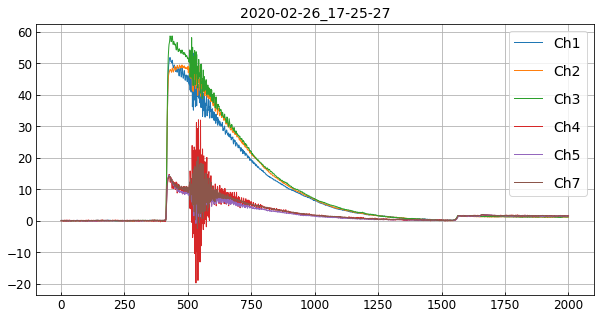

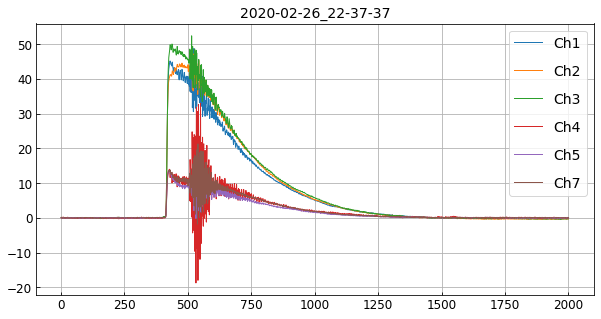

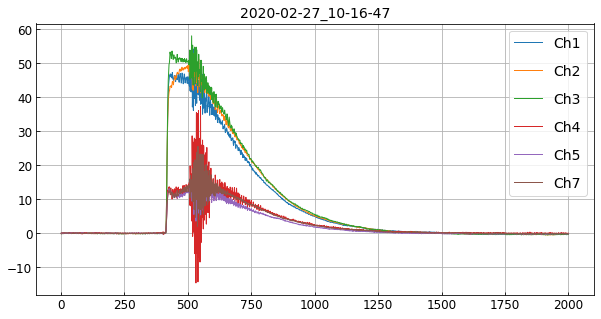

In [17]:
dirname = '/home/furkan/data/test_pods/'
for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            #print(str(os.path.splitext(filename)[0]))
            pkl_file = open(dirname + str(os.path.splitext(filename)[0]) + '.pkl', 'rb')
            mydata = pickle.load(pkl_file)

            dict_s ={}
            for key, value in mydata.items():
                #print(mydata[key].max(axis=0))
                channel=mydata[key]
                dict_s.update({key:channel})

            for key, value in dict_s.items():
                plt.plot(range(1, len(value) + 1), value, label=key, linewidth=1)
                # NOTE: changed `range(1, 4)` to mach actual values count
            plt.title(str(os.path.splitext(filename)[0]))
            plt.grid(True)
            #plt.yscale('log')
            #plt.xlim(200, 600)
            #plt.ylim(0.0001, 0.1)
            plt.legend(labelspacing=1, fontsize='medium')  # To draw legend
            plt.show()                 

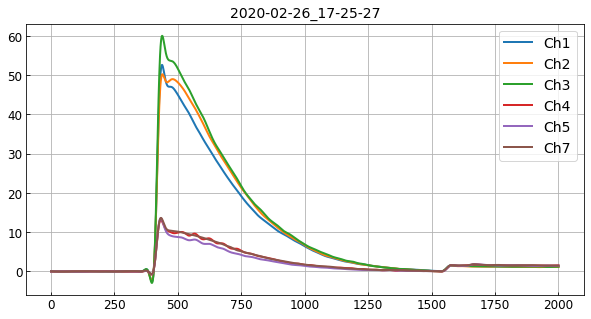

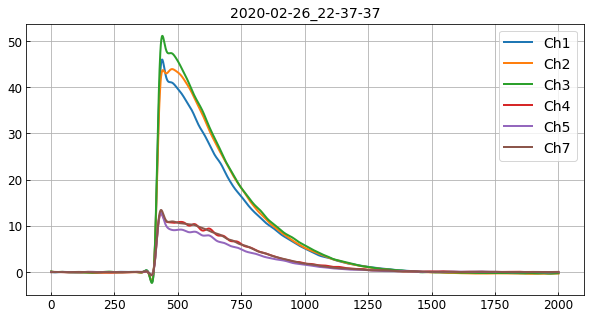

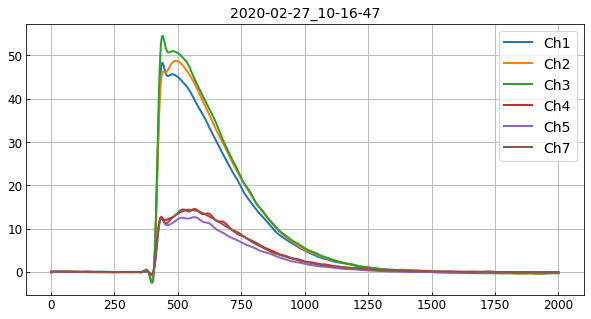

In [82]:
for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            pkl_file = open(dirname + str(os.path.splitext(filename)[0]) + '.pkl', 'rb')
            mydata = pickle.load(pkl_file)

            dict_s ={}
            for key, value in mydata.items():
                # lowpass filter
                b, a = signal.butter(3, 0.05)
                zi = signal.lfilter_zi(b, a)
                z, _ = signal.lfilter(b, a, value, zi=zi*value[0])
                z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
                channel = signal.filtfilt(b, a, value)   

                dict_s.update({key:channel})

            for key, value in dict_s.items():
                plt.plot(range(1, len(value) + 1), value, label=key, linewidth=2)
            plt.title(str(os.path.splitext(filename)[0]))
            plt.grid(True)
            plt.legend() 
            plt.show()    

2020-02-26_17-25-27.pkl
2020-02-26_22-37-37.pkl
2020-02-27_10-16-47.pkl


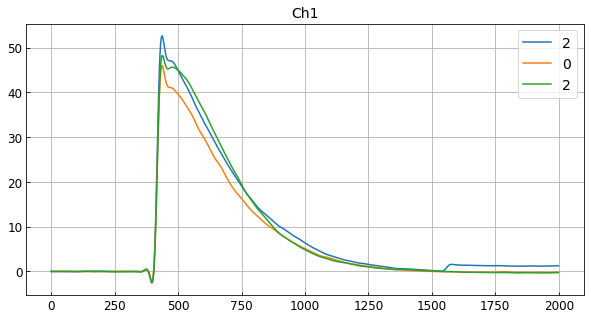

2020-02-26_17-25-27.pkl
2020-02-26_22-37-37.pkl
2020-02-27_10-16-47.pkl


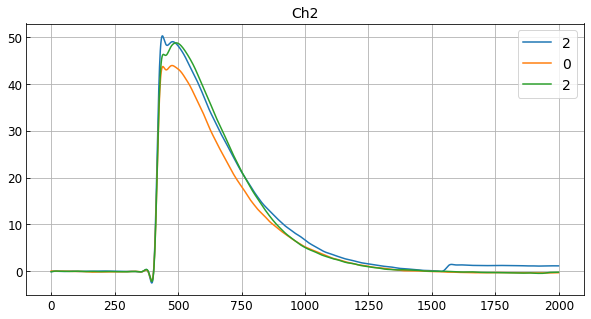

2020-02-26_17-25-27.pkl
2020-02-26_22-37-37.pkl
2020-02-27_10-16-47.pkl


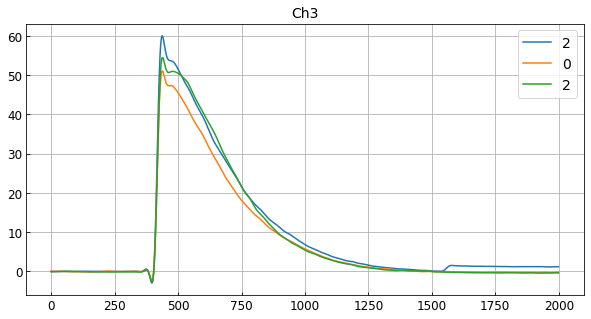

2020-02-26_17-25-27.pkl
2020-02-26_22-37-37.pkl
2020-02-27_10-16-47.pkl


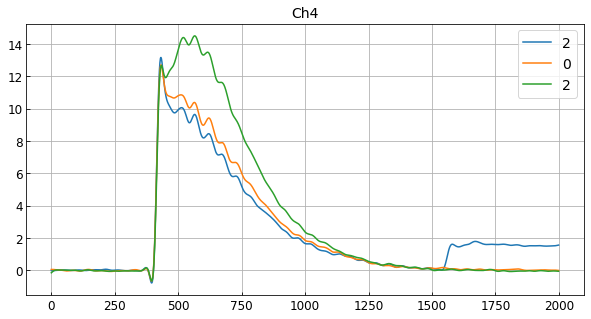

2020-02-26_17-25-27.pkl
2020-02-26_22-37-37.pkl
2020-02-27_10-16-47.pkl


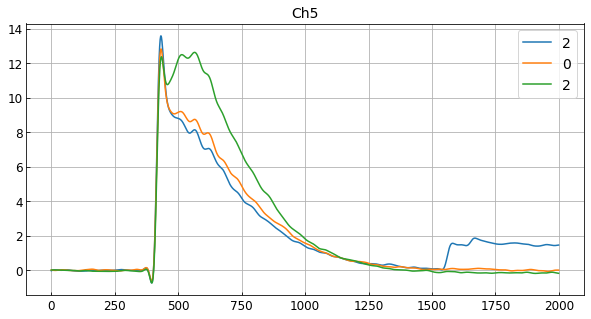

2020-02-26_17-25-27.pkl
2020-02-26_22-37-37.pkl
2020-02-27_10-16-47.pkl


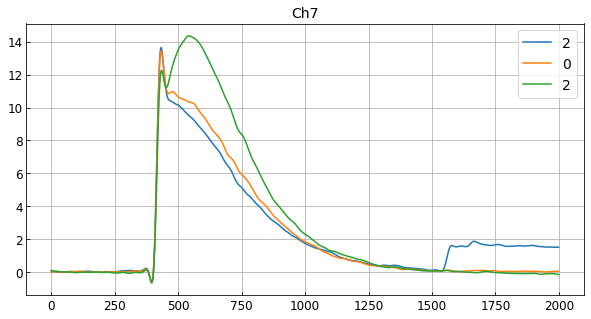

In [116]:
channels = ['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch7']
#channels = ['Ch1', 'Ch2']

for j in channels:
    for filename in sorted(os.listdir(dirname)):
        print(filename)
        if '.pkl' in filename:
            pkl_file = open(dirname + str(os.path.splitext(filename)[0]) + '.pkl', 'rb')
            mydata = pickle.load(pkl_file)
            b, a = signal.butter(3, 0.05)
            zi = signal.lfilter_zi(b, a)
            z, _ = signal.lfilter(b, a, mydata[j], zi=zi*mydata[j][0])
            z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
            y = signal.filtfilt(b, a, mydata[j])
        
        plt.grid(True)
        plt.title(j)
        plt.plot(y)
    #plt.legend(str(os.path.splitext(filename)[0]))
    plt.legend(filename) 

    plt.show()
